In [29]:

import statsmodels.formula.api as smf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import f1_score, roc_curve, auc, precision_score, recall_score


import seaborn as sns

from sklearn.preprocessing import scale

# 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# 나무 구조 시각화
import graphviz

In [30]:
def fun_plot_hist(data, var):
    plt.hist(data[data['JUDGE']==0][var], label = 'good', alpha = 0.5)
    plt.hist(data[data['JUDGE']==1][var], label = 'bad', alpha = 0.5)
    plt.legend()

In [31]:
pro = pd.read_csv('/Users/joylee/Documents/pro.csv', encoding='EUCKR')

In [32]:
pro.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,...,82.8,84.0,443,419,392,372,4115.0,3973.0,4432,2506.0
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,...,80.3,81.8,445,423,395,374,3642.0,4097.0,4499,2573.0
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,...,81.2,82.2,444,421,393,372,4063.0,3972.0,4460,2502.0
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,...,83.0,84.0,444,420,393,372,4131.0,4011.0,4466,2522.0
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,...,80.1,82.0,443,420,392,372,3632.0,4073.0,4482,2584.0


In [33]:
pro.columns

Index(['JUDGE', 'LOT_ID', 'PANEL_ID', 'TIME_1BLACK', 'TIME_2AG', 'TIME_3BUS',
       'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE', 'TIME_8AGING',
       'BLACK_RTD_TEMP_GLASS_START', 'BLACK_RTD_TEMP_GLASS_END',
       'BLACK_RTD_TEMP_WALL_START', 'BLACK_RTD_TEMP_WALL_MAX',
       'BLACK_RTD_PRES_START', 'BLACK_RTD_PRES_END',
       'BLACK_RTD_TEMP_GLASS_OUT', 'BLACK_RTD_TEMP_HOOD_START',
       'BLACK_RTD_TEMP_HOOD_MAX', 'AG_RTD_TEMP_GLASS_START',
       'AG_RTD_TEMP_GLASS_END', 'AG_RTD_TEMP_WALL_START',
       'AG_RTD_TEMP_WALL_MAX', 'AG_RTD_PRES_START', 'AG_RTD_PRES_END',
       'AG_RTD_TEMP_GLASS_OUT', 'AG_RTD_TEMP_HOOD_START',
       'AG_RTD_TEMP_HOOD_MAX', 'AG_EXPOSURE_TEMP_MASK',
       'BUS_DEVELOP_TEMP_OVEN1', 'BUS_DEVELOP_TEMP_OVEN2',
       'BUS_DEVELOP_TEMP_OVEN3', 'BUS_DEVELOP_TEMP_TANK1',
       'BUS_DEVELOP_TEMP_TANK2', 'BUS_DEVELOP_TEMP_TANK3', 'BUS_DEVELOP_PRES2',
       'BUS_DEVELOP_PRES3', 'BUS_FIRE_TEMP_KEEP_CH01',
       'BUS_FIRE_TEMP_KEEP_CH02', 'BUS_F

In [34]:
pro['JUDGE'] = pro['JUDGE'].map({'양품':0, '명점':1})

In [35]:
mc = pd.read_csv('/Users/joylee/Documents/mc.csv', encoding='EUCKR')
mc.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [36]:
mc.columns

Index(['JUDGE', 'LOT_ID', 'PANEL_ID', 'TIME_1BLACK', 'TIME_2AG', 'TIME_3BUS',
       'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE', 'TIME_8AGING',
       'MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD', 'MC_2AG_1PRINT', 'MC_2AG_2RTD',
       'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP', 'MC_3BUS_2FIRE',
       'MC_4DIELEC_1FIRE', 'MC_5MGO', 'MC_6PHOS_1R_1DISPENSER',
       'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER', 'MC_6PHOS_2G_2DRY',
       'MC_6PHOS_3B_1DISPENSER', 'MC_6PHOS_4FIRE', 'MC_7PASTE', 'MC_8AGING'],
      dtype='object')

In [37]:
mc['JUDGE'] = mc['JUDGE'].map({'양품':0, '명점':1})

In [38]:
pro1 = pro[['JUDGE', 'LOT_ID','PANEL_ID','DIELEC_FIRE_EXHAUST_HEAT5']]
pro1.head()

,JUDGE,LOT_ID,PANEL_ID,DIELEC_FIRE_EXHAUST_HEAT5
0,0,LOT-101,PNL-01,3283
1,0,LOT-101,PNL-02,3971
2,0,LOT-101,PNL-03,3324
3,0,LOT-101,PNL-04,3306
4,0,LOT-101,PNL-05,3900


In [39]:
pro2 = pro[['JUDGE', 'LOT_ID','PANEL_ID','BUS_DEVELOP_TEMP_TANK2']]
pro2.head()

,JUDGE,LOT_ID,PANEL_ID,BUS_DEVELOP_TEMP_TANK2
0,0,LOT-101,PNL-01,30.753
1,0,LOT-101,PNL-02,30.800
2,0,LOT-101,PNL-03,30.694
3,0,LOT-101,PNL-04,30.691
4,0,LOT-101,PNL-05,31.032


In [40]:
mc1 = mc[['JUDGE', 'LOT_ID','PANEL_ID','MC_4DIELEC_1FIRE']]
mc1.head()

,JUDGE,LOT_ID,PANEL_ID,MC_4DIELEC_1FIRE
0,0,LOT-101,PNL-01,3호기
1,0,LOT-101,PNL-02,3호기
2,0,LOT-101,PNL-03,3호기
3,0,LOT-101,PNL-04,3호기
4,0,LOT-101,PNL-05,3호기


In [41]:
mc2 = mc[['JUDGE', 'LOT_ID','PANEL_ID','MC_3BUS_1DEVELOP']]
mc2.head()

,JUDGE,LOT_ID,PANEL_ID,MC_3BUS_1DEVELOP
0,0,LOT-101,PNL-01,1호기
1,0,LOT-101,PNL-02,1호기
2,0,LOT-101,PNL-03,1호기
3,0,LOT-101,PNL-04,1호기
4,0,LOT-101,PNL-05,1호기


In [42]:
pro_mc1 = pd.merge(pro1, mc1, on=['LOT_ID','PANEL_ID', 'JUDGE'])

In [43]:
pro_mc1.head()

,JUDGE,LOT_ID,PANEL_ID,DIELEC_FIRE_EXHAUST_HEAT5,MC_4DIELEC_1FIRE
0,0,LOT-101,PNL-01,3283,3호기
1,0,LOT-101,PNL-02,3971,3호기
2,0,LOT-101,PNL-03,3324,3호기
3,0,LOT-101,PNL-04,3306,3호기
4,0,LOT-101,PNL-05,3900,3호기


In [44]:
pro_mc2 = pd.merge(pro2, mc2, on=['LOT_ID','PANEL_ID', 'JUDGE'])
pro_mc2.head()

,JUDGE,LOT_ID,PANEL_ID,BUS_DEVELOP_TEMP_TANK2,MC_3BUS_1DEVELOP
0,0,LOT-101,PNL-01,30.753,1호기
1,0,LOT-101,PNL-02,30.800,1호기
2,0,LOT-101,PNL-03,30.694,1호기
3,0,LOT-101,PNL-04,30.691,1호기
4,0,LOT-101,PNL-05,31.032,1호기


## - DIELEC_FIRE_EXHAUST_HEAT5

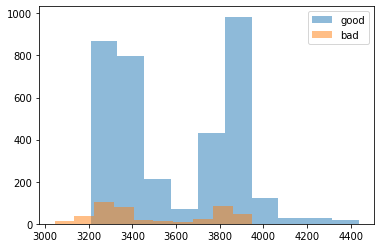

In [46]:
fun_plot_hist(pro1, 'DIELEC_FIRE_EXHAUST_HEAT5')

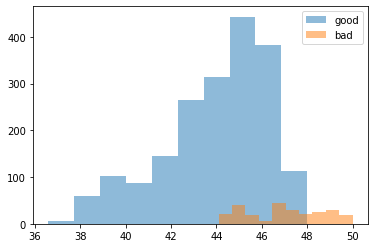

In [114]:
# AG 1호기
fun_plot_hist(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')], 'DIELEC_FIRE_EXHAUST_HEAT5')

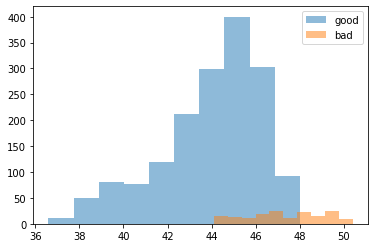

In [116]:
# AG 2호기
fun_plot_hist(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')], 'DIELEC_FIRE_EXHAUST_HEAT5')

### - 온도 구간 분류
#### 1. 분류하기 전의 불량률
#### 2. 44도 이상일 때의 불량률
#### 3. 44도 미만일 때의 불량률

### - 설비와의 연관성
#### 1. AG_RTD 1호기에서 고온/저온 구간 불량률
#### 2. AG_RTD 2호기에서 고온/저온 구간 불량률


In [48]:
# 분류하기 전 불량률
round(pro1['JUDGE'].mean(),3)

0.106

In [59]:
# 46도이상
round(pro1[pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=3243]['JUDGE'].mean(),3)

0.091

In [60]:
# 44도 미만
round(pro1[pro1['DIELEC_FIRE_EXHAUST_HEAT5']<3243]['JUDGE'].mean(),3)

0.663

In [61]:
# 1호기 불량률
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')]['JUDGE'].mean(),3)

0.106

In [62]:
# 2호기 불량률
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')]['JUDGE'].mean(),3)

0.126

In [68]:
# 1호기& 46도 미만
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=3243)]['JUDGE'].mean(),3)

0.094

In [65]:
# 1호기& 46도 미만
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']<3243)]['JUDGE'].mean(),3)

0.679

In [70]:
# 2호기& 46도 이상
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=46)]['JUDGE'].mean(),3)

0.126

In [56]:
# 2호기& 46도 미만
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']<46)]['JUDGE'].mean(),3)

nan

## - BUS_DEVELOP_TEMP_TANK2

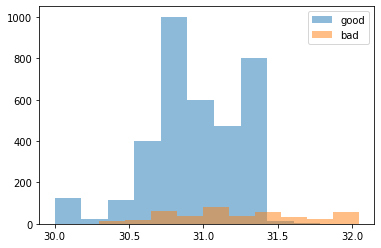

In [100]:
fun_plot_hist(pro2, 'BUS_DEVELOP_TEMP_TANK2')

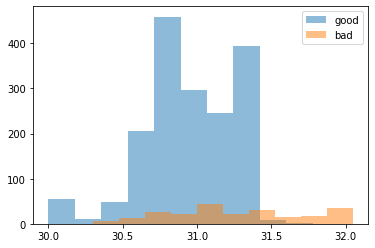

In [111]:
# BUS 1호기
fun_plot_hist(pro_mc2[pro_mc2['MC_3BUS_1DEVELOP']=='1호기'], 'BUS_DEVELOP_TEMP_TANK2')

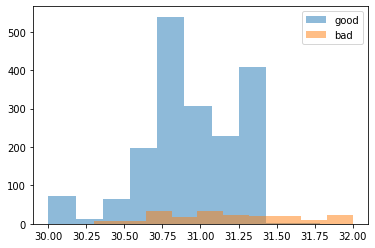

In [112]:
# BUS 2호기
fun_plot_hist(pro_mc2[pro_mc2['MC_3BUS_1DEVELOP']=='2호기'], 'BUS_DEVELOP_TEMP_TANK2')

In [132]:
# 분류하기 전 불량률
round(pro2['JUDGE'].mean(),3)

0.106

In [71]:
# 1호기 불량률
round(pro_mc2[(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')]['JUDGE'].mean(),3)

0.116

In [72]:
# 2호기 불량률
round(pro_mc2[(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')]['JUDGE'].mean(),3)

0.096

In [73]:
# 31도 이상 불량률
round(pro_mc2[(pro_mc2['BUS_DEVELOP_TEMP_TANK2']>=31)]['JUDGE'].mean(),3)

0.151

In [153]:
# 31도 미만 불량률
round(pro_mc2[(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)]['JUDGE'].mean(),3)

0.064

In [154]:
# 31.4도 미만 불량률
round(pro_mc2[(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)]['JUDGE'].mean(),3)

0.082

In [156]:
# 31.4도 이상 불량률
round(pro_mc2[(pro_mc2['BUS_DEVELOP_TEMP_TANK2']>=31.4)]['JUDGE'].mean(),3)

0.193

### AG 온도 구분 시 불량률

In [109]:
# AG 1호기 BUS 1호기 불량률 & 31
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='3호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc1['DIELEC_FIRE_EXHAUST_HEAT5']>=3243)]['JUDGE'].mean(),3)

0.066

In [158]:
# AG 1호기 BUS 1호기 불량률 & 31.4
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)]['JUDGE'].mean(),3)

0.085

In [98]:
# AG 1호기 BUS 1호기 불량률 & 31
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='3호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')]['JUDGE'].mean(),3)

0.073

In [78]:
# AG 1호기 BUS 1호기 불량률 & 31
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')]['JUDGE'].mean(),3)

0.128

In [79]:
# AG 1호기 BUS 1호기 불량률 & 31
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')]['JUDGE'].mean(),3)

0.128

In [81]:
# AG 1호기 BUS 1호기 불량률 & 31
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='3호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')]['JUDGE'].mean(),3)

0.1

In [159]:
# AG 1호기 BUS 2호기 불량률 & 31
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)]['JUDGE'].mean(),3)

0.081

In [160]:
# AG 1호기 BUS 2호기 불량률 & 31.4
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)]['JUDGE'].mean(),3)

0.097

In [161]:
# AG 2호기 BUS 1호기 불량률 & 31
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)]['JUDGE'].mean(),3)

0.068

In [162]:
# AG 2호기 BUS 1호기 불량률 & 31.4
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)]['JUDGE'].mean(),3)

0.093

In [163]:
# AG 2호기 BUS 2호기 불량률 & 31
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)]['JUDGE'].mean(),3)

0.044

In [164]:
# AG 2호기 BUS 2호기 불량률 & 31.4
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)]['JUDGE'].mean(),3)

0.059

In [166]:
# AG 1호기 BUS 1호기 불량률 & 31 & 고온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=46)]['JUDGE'].mean(),3)

0.179

In [167]:
# AG 1호기 BUS 1호기 불량률 & 31.4 & 고온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=46)]['JUDGE'].mean(),3)

0.226

In [168]:
# AG 1호기 BUS 2호기 불량률 & 31 & 고온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=46)]['JUDGE'].mean(),3)

0.207

In [169]:
# AG 1호기 BUS 2호기 불량률 & 31.4 & 고온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=46)]['JUDGE'].mean(),3)

0.247

In [170]:
# AG 1호기 BUS 1호기 불량률 & 31 & 저온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']<46)]['JUDGE'].mean(),3)

0.029

In [171]:
# AG 1호기 BUS 1호기 불량률 & 31.4 & 저온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']<46)]['JUDGE'].mean(),3)

0.035

In [172]:
# AG 1호기 BUS 2호기 불량률 & 31 & 저온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']<46)]['JUDGE'].mean(),3)

0.03

In [173]:
# AG 1호기 BUS 2호기 불량률 & 31.4 & 저온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='1호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']<46)]['JUDGE'].mean(),3)

0.034

In [174]:
# AG 2호기 BUS 1호기 불량률 & 31 & 고온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=46)]['JUDGE'].mean(),3)

0.21

In [175]:
# AG 2호기 BUS 1호기 불량률 & 31.4 & 고온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=46)]['JUDGE'].mean(),3)

0.263

In [176]:
# AG 2호기 BUS 2호기 불량률 & 31 & 고온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=46)]['JUDGE'].mean(),3)

0.15

In [177]:
# AG 2호기 BUS 2호기 불량률 & 31.4 & 고온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']>=46)]['JUDGE'].mean(),3)

0.194

In [178]:
# AG 2호기 BUS 1호기 불량률 & 31 & 저온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']<46)]['JUDGE'].mean(),3)

0.02

In [179]:
# AG 2호기 BUS 1호기 불량률 & 31.4 & 저온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='1호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']<46)]['JUDGE'].mean(),3)

0.025

In [180]:
# AG 2호기 BUS 2호기 불량률 & 31 & 저온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']<46)]['JUDGE'].mean(),3)

0.009

In [181]:
# AG 2호기 BUS 2호기 불량률 & 31.4 & 저온
round(pro_mc1[(pro_mc1['MC_4DIELEC_1FIRE']=='2호기')&(pro_mc2['MC_3BUS_1DEVELOP']=='2호기')&(pro_mc2['BUS_DEVELOP_TEMP_TANK2']<31.4)&(pro1['DIELEC_FIRE_EXHAUST_HEAT5']<46)]['JUDGE'].mean(),3)

0.017

## - DIELEC_FIRE_EXHAUST_HEAT

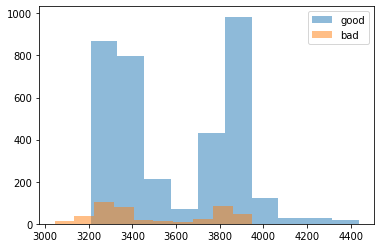

In [10]:
fun_plot_hist(pro, 'DIELEC_FIRE_EXHAUST_HEAT5')

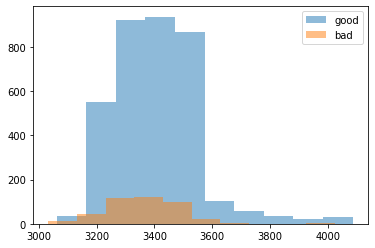

In [11]:
fun_plot_hist(pro, 'DIELEC_FIRE_EXHAUST_HEAT4')

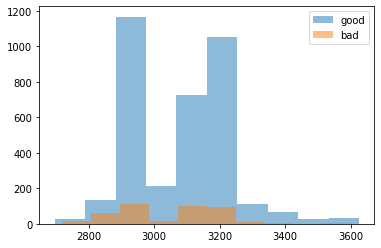

In [12]:
fun_plot_hist(pro, 'DIELEC_FIRE_EXHAUST_HEAT7')